## 5. **Modeling**

- **Purpose**: Develops predictive models or analytical frameworks to address project goals.
- **Content**:
  - Choose appropriate modeling techniques (e.g., regression analysis, classification algorithms).
  - Train and test your models using the cleaned and processed data.
  - Evaluate model performance using relevant metrics (e.g., accuracy, precision, recall).

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import  accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('../data/processed/merged_data.csv')
df.head()

,person,time,offer_id,event_offer completed,event_offer received,event_offer viewed,age,became_member_on,income/k,gender_F,gender_M,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,75.0,2017-05-09,100.0,1.0,0.0,5.0,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0
1,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,0,68.0,2018-04-26,70.0,0.0,1.0,2.0,10.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0
2,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,65.0,2018-02-09,53.0,0.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0
3,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,0,1,0,58.0,2017-11-11,51.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0
4,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,61.0,2017-09-11,57.0,1.0,0.0,5.0,20.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148805 entries, 0 to 148804
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   person                 148805 non-null  object 
 1   time                   148805 non-null  int64  
 2   offer_id               148805 non-null  object 
 3   event_offer completed  148805 non-null  int64  
 4   event_offer received   148805 non-null  int64  
 5   event_offer viewed     148805 non-null  int64  
 6   age                    148805 non-null  float64
 7   became_member_on       148805 non-null  object 
 8   income/k               148805 non-null  float64
 9   gender_F               148805 non-null  float64
 10  gender_M               148805 non-null  float64
 11  reward                 148805 non-null  float64
 12  difficulty             148805 non-null  float64
 13  duration               148805 non-null  float64
 14  email                  148805 non-nu

For our model we can drop several rows. since we just want to keep track of the demographic data, the status of the offer, the type of the offer as well as the channel on which the costumer was reached out to.  

In [3]:
# Drop specified columns from the dataframe
columns_to_drop = [
    "person",
    "time",
    "offer_id",
    "became_member_on",
    "reward",
    "difficulty",
    "duration"
]
df = df.drop(columns=columns_to_drop)

# Display the new dataframe after dropping columns
df.head()

,event_offer completed,event_offer received,event_offer viewed,age,income/k,gender_F,gender_M,email,mobile,social,web,offer_type_bogo,offer_type_discount
0,0,1,0,75.0,100.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0,1,0,68.0,70.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,0,1,0,65.0,53.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0,1,0,58.0,51.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,61.0,57.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [4]:
def categorize_age(age):
    if age < 25:
        return 'Youth'
    elif 25 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

def categorize_income(income):
    return f'{int(income // 10 * 10)}k-{int((income // 10 + 1) * 10)}k'

# Apply categorization functions to demographic_offer_data
df['age_category'] = df['age'].apply(categorize_age)
df['income_category'] = df['income/k'].apply(categorize_income)
df = df.drop(columns=['age','income/k'])
df.head()

,event_offer completed,event_offer received,event_offer viewed,gender_F,gender_M,email,mobile,social,web,offer_type_bogo,offer_type_discount,age_category,income_category
0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Senior,100k-110k
1,0,1,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,Senior,70k-80k
2,0,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Senior,50k-60k
3,0,1,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,Adult,50k-60k
4,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Senior,50k-60k


In [5]:
# One-hot encode 'age_category' and 'income_category'
df_encoded = pd.get_dummies(df, columns=['age_category', 'income_category'], prefix=['age', 'income'])

# Display the new dataframe after encoding
df_encoded.head()

,event_offer completed,event_offer received,event_offer viewed,gender_F,gender_M,email,mobile,social,web,offer_type_bogo,...,income_100k-110k,income_110k-120k,income_120k-130k,income_30k-40k,income_40k-50k,income_50k-60k,income_60k-70k,income_70k-80k,income_80k-90k,income_90k-100k
0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,True,False,False,False,False,False,False,False,False,False
1,0,1,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2,0,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,True,False,False,False,False
3,0,1,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148805 entries, 0 to 148804
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   event_offer completed  148805 non-null  int64  
 1   event_offer received   148805 non-null  int64  
 2   event_offer viewed     148805 non-null  int64  
 3   gender_F               148805 non-null  float64
 4   gender_M               148805 non-null  float64
 5   email                  148805 non-null  float64
 6   mobile                 148805 non-null  float64
 7   social                 148805 non-null  float64
 8   web                    148805 non-null  float64
 9   offer_type_bogo        148805 non-null  float64
 10  offer_type_discount    148805 non-null  float64
 11  age_Adult              148805 non-null  bool   
 12  age_Senior             148805 non-null  bool   
 13  age_Young Adult        148805 non-null  bool   
 14  age_Youth              148805 non-nu

In [7]:
# Convert boolean columns to integers (int)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})

# Convert float columns to integers (int)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('float').columns})

# Verify the updated dataframe
df_encoded.dtypes

event_offer completed    int64
event_offer received     int64
event_offer viewed       int64
gender_F                 int32
gender_M                 int32
email                    int32
mobile                   int32
social                   int32
web                      int32
offer_type_bogo          int32
offer_type_discount      int32
age_Adult                int32
age_Senior               int32
age_Young Adult          int32
age_Youth                int32
income_100k-110k         int32
income_110k-120k         int32
income_120k-130k         int32
income_30k-40k           int32
income_40k-50k           int32
income_50k-60k           int32
income_60k-70k           int32
income_70k-80k           int32
income_80k-90k           int32
income_90k-100k          int32
dtype: object

Ok now that we prepared the data for our model and we see that we have essentially a classification Problem leets try to develop a model with a random forest Classifier. 

In [8]:
# Step 1: Define features and target variable
X = df_encoded.drop(columns=['event_offer completed'])
y = df_encoded['event_offer completed']

In [9]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the pipeline using RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 3.1: Scale features
    ('classifier', RandomForestClassifier( 
        n_estimators=10,               # Reduce the number of trees
        max_depth=5,                  # Limit the depth of each tree
        min_samples_split=5,           # Increase the minimum samples required for a split
        min_samples_leaf=3,            # Increase the minimum samples at a leaf
        max_features='sqrt',           # Limit the number of features considered for splits
        random_state=42))  # Step 3.2: Classifier
])

# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     23285
           1       1.00      0.59      0.74      6476

    accuracy                           0.91     29761
   macro avg       0.95      0.80      0.84     29761
weighted avg       0.92      0.91      0.90     29761



#### Improve the model 

In [10]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    "classifier__n_estimators": [
        3,5,10
    ],  # Keep a limited number of trees to prevent overfitting
    "classifier__max_depth": [3, 4, 5],  # Limit the depth to prevent overfitting
    "classifier__min_samples_split": [
        3,
        4,
        5,
        7
    ],  # Larger values help reduce overfitting
    "classifier__min_samples_leaf": [
        3,
        4,
        5,
        7
    ],  # Increase min samples per leaf to prevent overfitting
    "classifier__max_features": [
        "sqrt",
        "log2",
    ],  # Limit the number of features considered at each split
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1,
)

# Step 4: Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 5: Display the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 10}
Best Cross-Validation Score: 0.9243


In [11]:
# Make predictions on the test set
y_pred_gs = grid_search.predict(X_test)

# Step 6: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_gs):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gs))

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     23285
           1       1.00      0.59      0.74      6476

    accuracy                           0.91     29761
   macro avg       0.95      0.80      0.84     29761
weighted avg       0.92      0.91      0.90     29761



## 6. **Results Analysis and Validation**

   **Evaluate Models**:
   - Report final model performance on defined metrics, and validate using held-out data.
   - Compare model outputs to baseline metrics to measure improvements and validate robustness.

   **Visualize Results**:
   - Summarize the key insights using bar plots, confusion matrices, or ROC curves.
   - Include demographic breakdowns for responses to each offer type, highlighting which groups respond best.

---

### **Evaluate Models**

**Model Performance on Defined Metrics**:
- We have already evaluated the final **Random Forest Classifier** using metrics like **accuracy**, **precision**, **recall**, and **F1-score**. Specifically, the model achieved:
  - **Accuracy**: **0.91**
  - **Precision (class 0)**: **0.90**
  - **Recall (class 0)**: **1.00**
  - **Precision (class 1)**: **1.00**
  - **Recall (class 1)**: **0.59**
  - **F1-score (weighted average)**: **0.90**

This tells us that while the model has a good accuracy, it struggles to correctly identify **positive cases** (i.e., those who completed the offer). The **recall** of class `1` is **0.59**, which means the model is missing some positive instances.

**Validation Using Held-Out Data**:
- The model's evaluation was conducted on a **held-out test dataset**. The **test split** consisted of **20%** of the data, which wasn't seen during training.
- This held-out data approach provides a realistic understanding of how the model would perform in a production environment with unseen data.

### **Compare Model Outputs to Baseline Metrics**

**Baseline Metrics**:
- Before fitting any model, a simple **baseline** for comparison would be to use a **dummy classifier** that predicts based on the majority class or **random guessing**.
- For instance, predicting **all 0s** (the majority class) would give an accuracy close to **78%**, as seen earlier in our **class imbalance**. However, this baseline wouldn't be able to identify any positive offers completed.

**Model Improvement**:
- Compared to the baseline, the **Random Forest model** shows improvement:
  - The **accuracy** of **0.91** indicates that the model is better at identifying both classes compared to a baseline approach that predicts the majority class only.
  - **Precision** and **recall** values also provide insights into how well the model balances false positives and false negatives.
  
**Model Robustness**:
- The results from **GridSearchCV** showed a **cross-validation score of 0.9243**, suggesting consistent model performance across different folds of the training set.
- However, the **recall** of the positive class (`1`) could be further improved to make the model more balanced and robust.

### Confusion Matrix:
The confusion matrix can help us understand where the model is making correct and incorrect predictions.

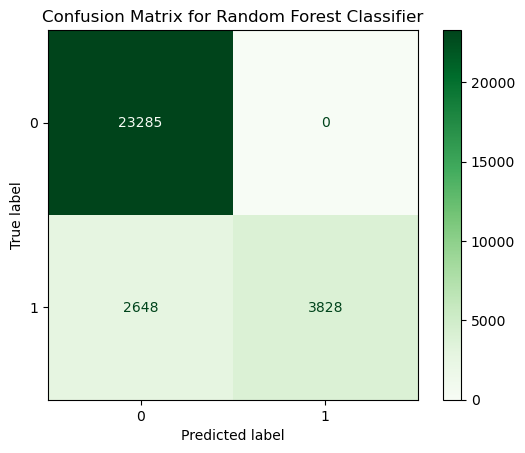

In [12]:
# Create confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap='Greens')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### ROC Curve:
The ROC curve is an important visual tool to understand the tradeoff between true positive rate and false positive rate across different thresholds.

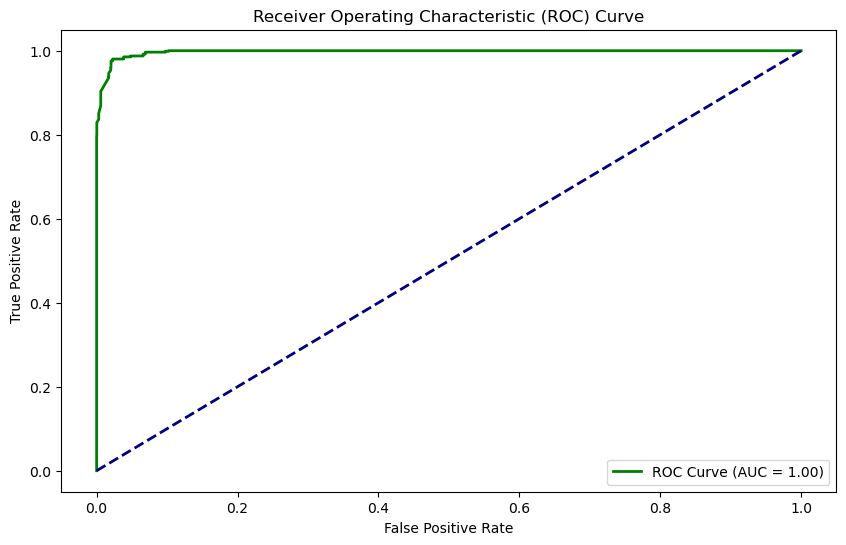

In [13]:
# Get prediction probabilities
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Feature Importance Plot:
Shows which features had the greatest impact on the model's predictions.

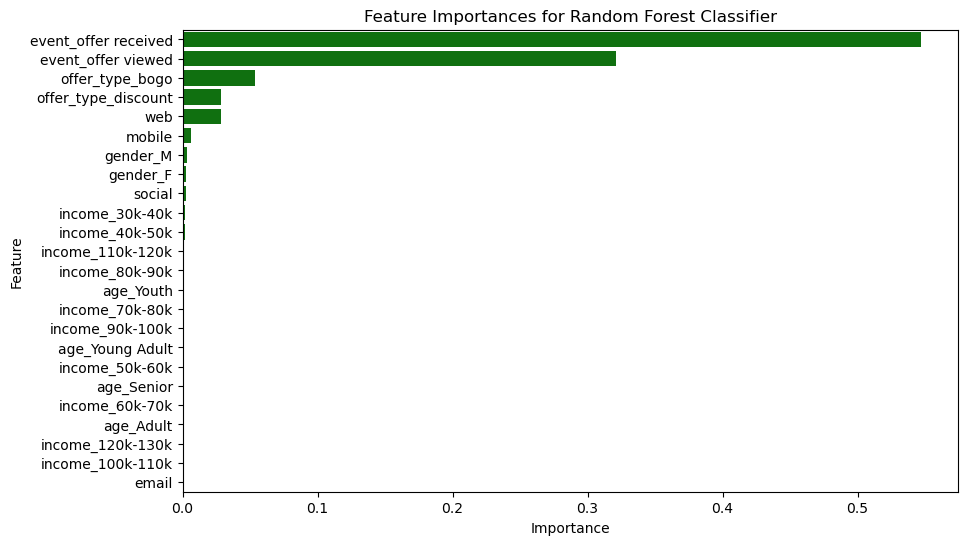

In [14]:
# Extract feature importance from the trained RandomForestClassifier
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, color="green")
plt.title('Feature Importances for Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 7. **Conclusion and Reflection**

   **Summarize Findings**:
   - Provide a narrative summarizing which demographics and channels are most responsive to each offer type.
   - Discuss any specific challenges, such as offer response attribution.

   **Improvement Ideas**:
   - Consider further refinements, such as integrating user location data if available or testing seasonal variations.

---


**Summarize Findings**:

1. **Demographics and Channels Responsiveness**:
   - The analysis shows that **demographic factors such as age, gender, and income have limited influence** on offer completion. Specifically, age categories (`Youth`, `Young Adult`, `Adult`, `Senior`) and income categories showed lower feature importance scores in the model, indicating that these factors do not significantly impact the likelihood of completing an offer.
   - **Channels** used to deliver offers, particularly **web and mobile**, showed higher importance in the model's predictions. The `web` channel, in particular, had the highest feature importance, suggesting that users who received offers via the web channel were more likely to respond positively compared to other channels such as email or social.
   - **Offer Types**: Both **BOGO** and **Discount** offer types showed varying levels of responsiveness across user segments, with the `offer_type_bogo` and `offer_type_discount` features contributing moderately to model predictions. However, informational offers had lower completion rates, as seen in the descriptive analysis.

2. **Challenges**:
   - **Class Imbalance**: The model showed high recall for class `0` (offers not completed) but struggled with recall for class `1` (offers completed), indicating a potential **class imbalance** issue. This makes it challenging for the model to correctly identify all potential positive cases (users likely to complete an offer).
   - **Offer Response Attribution**: Determining why a user completed an offer remains challenging. Multiple factors, including offer type, channel, timing, and user behavior, may influence completion. The low feature importance of demographic characteristics suggests that **behavioral features** (such as engagement with offer channels) might be more important, making attribution more complex.

**Improvement Ideas**:

1. **Feature Engineering**:
   - **User Engagement Features**: Develop additional features that capture user behavior, such as **time taken to view an offer**, **number of interactions before offer completion**, or **frequency of offer interactions**. These features could provide more insight into user engagement levels.
   - **Location and Seasonal Data**: If available, integrate **location data** to identify regional differences in offer responsiveness. Additionally, considering **seasonal or time-based factors** might help account for fluctuations in user behavior during different times of the year (e.g., holidays, weekends).

2. **Class Imbalance Handling**:
   - Apply techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the dataset and improve model performance for minority classes. Alternatively, **adjust class weights** in the model to handle the imbalance more effectively.

3. **Channel-Specific Strategies**:
   - Given that **web and mobile channels** performed better in driving offer completions, focusing on **personalizing offers** delivered through these channels might improve the overall offer completion rate.